<img src='https://mundiwebservices.com/build/assets/Mundi-Logo-CMYK-colors.png'  align='left' width='15%' ></img>  

# Mundi Web Coverage Service (WCS)

In [1]:
from mundilib import MundiCatalogue

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

### Service end point - identification

In [3]:
c = MundiCatalogue()
wcs = c.get_collection("Sentinel2").mundi_wcs('L1C')

In [4]:
try:
    print("Type:    " + wcs.identification.type)
    print("Version: " + wcs.identification.version)
    print("Service: " + wcs.identification.title)
except Exception as e:
    print ("\n----- Error occured -----\n" + str(e))

Type:    OGC:WCS
Version: 1.0.0
Service: Sentinel-2 L1C


In [5]:
wcs

In [6]:
wcs.identification.abstract

'The Copernicus project’s Sentinel satellites are revolutionizing earth observation (EO). Its free, full and open access to data with very short revisit times, high spatial resolution, and good spectral resolution are crucial for many applications. The portfolio of possible products is vast - use-cases of such a service range from plant health monitoring, land and water body change, flood monitoring, disaster mapping and more.However the current gap between Sentinel source data and its end-users is large:• \x90  ESA’s complex Scientific Data Hub• \x90  raster files are compressed with JPEG2000 (13 raster filesfor each product, one per spectral band)• \x90  terabytes of data per week• \x90  additional processing requirementsTackling the data in an old-fashioned way -  offering individual derivative products simply does not work anymore, the associated time and costs are large and defeat most of the major benefits of the Sentinel project.Our approach combines cloud-based GIS technologies

#### Available layers ('FeatureTypes' list) with their attributes

In [7]:
# available layers and attributes
try:
    for lay in list(wcs.contents):
        print (lay + " i.e. " + "'" + wcs[lay].title + "'")
            
        #print (wcs[lay].name + " i.e. " + "'" + wcs[lay].title + "'")    # ERROR?: no 'name' attribute seems to be defined on layers
        #print (wcs[lay].queryable)
        #print (wcs[lay].children)
        #print (wcs[lay].parent.title)
        #print (wcs[lay].boundingBoxWGS84)
        #print (wcs[lay].crsOptions)
        #print (wcs[lay].styles)
        
except Exception as e:
    print ("----- Error occured -----\n" + str(e))

09_NDVI i.e. '09_NDVI'
1_NATURAL_COL0R i.e. 'Natural color'
2_COLOR_INFRARED__VEGETATION_ i.e. 'Color Infrared (vegetation)'
3_FALSE_COLOR__URBAN_ i.e. 'False color (urban)'
4_AGRICULTURE i.e. 'Agriculture'
5_VEGETATION_INDEX i.e. 'Vegetation Index'
6_MOISTURE_INDEX i.e. 'Moisture Index'
7_GEOLOGY i.e. 'Geology'
8_BATHYMETRIC i.e. 'Bathymetric'
90_ATMOSPHERIC_PENETRATION i.e. 'Atmospheric penetration'
91_SWIR i.e. 'SWIR'
92_NDWI i.e. 'NDWI'
93-SWIR-2-11-12 i.e. 'SWIR-2,11,12'
B01 i.e. 'B01'
B02 i.e. 'B02'
B03 i.e. 'B03'
B04 i.e. 'B04'
B05 i.e. 'B05'
B06 i.e. 'B06'
B07 i.e. 'B07'
B08 i.e. 'B08'
B09 i.e. 'B09'
B10 i.e. 'B10'
B11 i.e. 'B11'
B12 i.e. 'B12'
B8A i.e. 'B8A'


##### Available operations with offered output format

In [8]:
#[op.name for op in wcs.operations]

for op in wcs.operations:
    print (op.name + str(wcs.getOperationByName(op.name).methods))  # ERROR?: no 'formatOptions' attribute seems to be defined on operation 'GetCapabilities'

    try :
        for fm in wcs.getOperationByName(op.name).formatOptions:
            print ("\t" + fm)
        print ("")
    
    except Exception as e:
        print ("\n----- Error occured -----\n" + str(e) + "\n")


GetCapabilities[{'type': 'Get', 'url': 'http://shservices.mundiwebservices.com/ogc/wcs/d275ef59-3f26-4466-9a60-ff837e572144?'}]

----- Error occured -----
'OperationMetadata' object has no attribute 'formatOptions'

DescribeCoverage[{'type': 'Get', 'url': 'http://shservices.mundiwebservices.com/ogc/wcs/d275ef59-3f26-4466-9a60-ff837e572144?'}]

----- Error occured -----
'OperationMetadata' object has no attribute 'formatOptions'

GetCoverage[{'type': 'Get', 'url': 'http://shservices.mundiwebservices.com/ogc/wcs/d275ef59-3f26-4466-9a60-ff837e572144?'}]

----- Error occured -----
'OperationMetadata' object has no attribute 'formatOptions'



#### Attributes of a layer

In [9]:
lay = '92_NDWI'

#for item in dir(wcs.contents[lay]):
#    if "_" not in item:
#        print (item)
        
wcs.contents[lay].boundingboxes

for item in dir(wcs.contents[lay].grid):
    if "_" not in item:
        print (item + ": " + str(wcs.contents[lay].grid.__dict__[item]))
        
wcs.contents[lay].supportedFormats

axislabels: []
dimension: 2
highlimits: ['4007502', '4007502']
lowlimits: ['0', '0']
offsetvectors: [['10', '0'], ['0', '-10']]
origin: ['-20037508.342789', '20037508.342789']


['GeoTIFF']

### Usage

#### GetCoverage: Display B8A from Toulouse

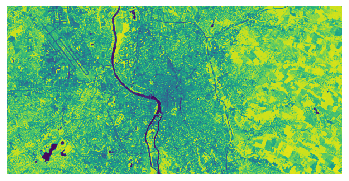

In [10]:
img = wcs.getCoverage(identifier='B8A', 
                                format='image/jpeg', 
                                bbox=(146453.3462,5397218.5672,176703.3001,5412429.5358), # Toulouse
                                time=['2022-09-31T00:00:00.0'],
                                showlogo=False,
                                width=600,
                                height=300,
                                srs="EPSG:3857")

img = Image.open(img)
    
# Embedded plot - Display image
plt.axis('off')
plt.imshow(img)